In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [2]:
# Load the training set
df = pd.read_csv(r'.\eyeTracking_dataset/eyetracking_dataset.csv')

print("#-----> First 5 rows of the training set:\n")
df.head(5)

#-----> First 5 rows of the training set:



,Participant Code,Gender,Avg_Fix_Duration,Avg_Sacc_Duration,Total_Fix,Total_Sacc,Sacc_Fix_Ratio,Dyslexic
0,111JA2,female,428.048781,22.077922,82,77,0.939024,yes
1,111RP1,male,342.020202,22.244898,99,98,0.989899,yes
2,112JU3,male,280.336135,17.857143,119,112,0.941176,no
3,112KA1,male,575.937500,9.206349,64,63,0.984375,yes
4,11GM3,male,200.173913,28.041237,115,97,0.843478,no


In [3]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Dyslexic'] = label_encoder.fit_transform(df['Dyslexic'])

In [4]:
df.drop(columns=['Participant Code'], inplace=True)
X_features = df.drop(['Dyslexic'], axis=1)
y_labels= df['Dyslexic']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42, stratify=y_labels)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Best Parameters found by GridSearchCV:
{'C': 10, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.9459459459459459
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.90      1.00      0.95        19

    accuracy                           0.95        37
   macro avg       0.95      0.94      0.95        37
weighted avg       0.95      0.95      0.95        37



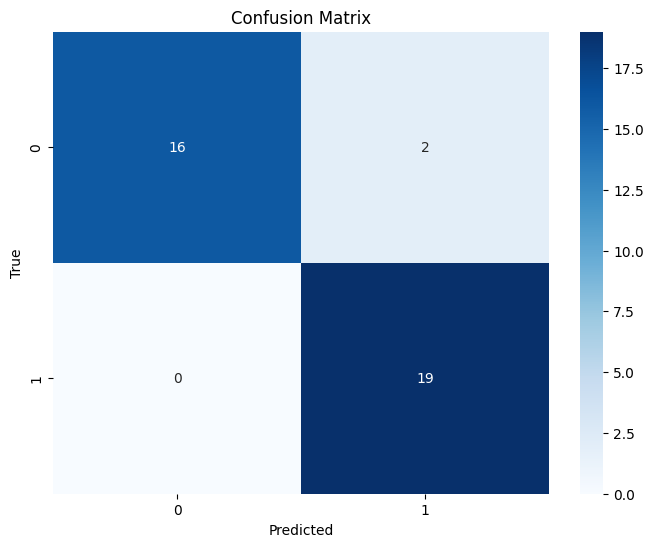

In [17]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'sigmoid', 'poly']
}

# Initialize and fit the GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters found by GridSearchCV:")
print(grid.best_params_)

# Make predictions on the test set
y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [3]:
!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 15.6/15.6 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4



[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\Haneen\.conda\envs\Adventure-Drivers-main\lib\site-packages\xgboost\core.py:158: UserWarning: [00:05:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters found by GridSearchCV:
{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.8918918918918919
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.89      0.89      0.89        19

    accuracy                           0.89        37
   macro avg       0.89      0.89      0.89        37
weighted avg       0.89      0.89      0.89        37



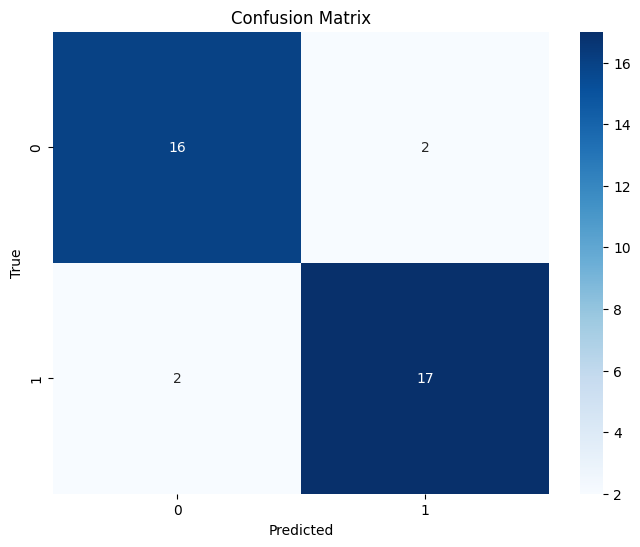

In [14]:
import xgboost as xgb

# Set up the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the XGBClassifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters found by GridSearchCV:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9459459459459459
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.95      0.95      0.95        19

    accuracy                           0.95        37
   macro avg       0.95      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37



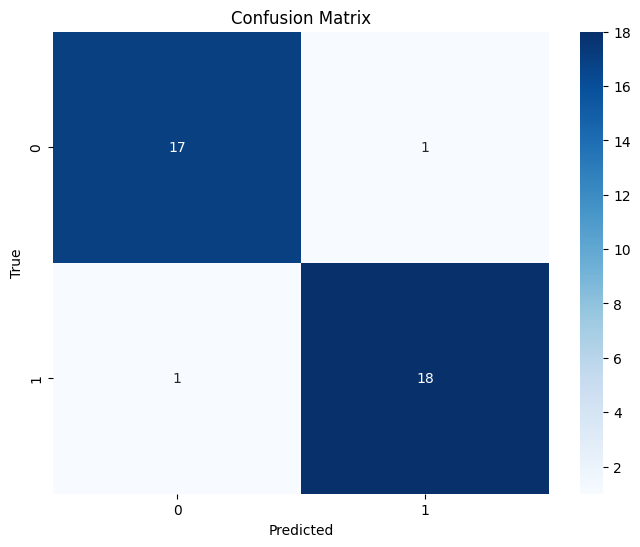

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [7]:
# Train the Random Forest model with the best parameters on the full dataset
best_rf_clf = RandomForestClassifier( bootstrap= True, max_depth= None, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100, random_state=42)
best_rf_clf.fit(X_features, y_labels)

RandomForestClassifier(min_samples_leaf=2, random_state=42)

In [8]:
import pickle

# Save the model to a .sav file
filename = 'eyetracking_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(best_rf_clf, file)

pickle.dump(scaler, open("scaler.sav", "wb"))

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Predict on test data
y_pred = gb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.918918918918919
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.90      0.95      0.92        19

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37



In [84]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.01, random_state=42)

# Train the model
ada_clf.fit(X_train, y_train)

# Predict on test data
y_pred = ada_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.918918918918919
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.94      0.89      0.92        19

    accuracy                           0.92        37
   macro avg       0.92      0.92      0.92        37
weighted avg       0.92      0.92      0.92        37



d:\apps n shit\programming\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


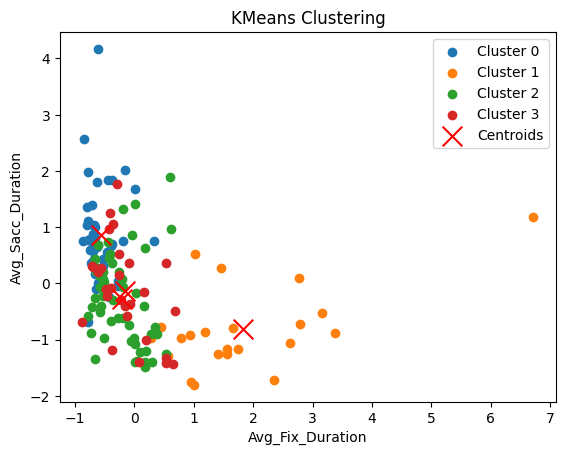

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_train is already defined and contains your features
# Features: Gender, Avg_Fix_Duration, Avg_Sacc_Duration, Total_Fix, Total_Sacc, Sacc_Fix_Ratio

# Define and fit the KMeans model
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_result = kmeans_model.fit_predict(X_train)

# Get all of the unique KMeans clusters
kmeans_clusters = np.unique(kmeans_result)

# Plot the KMeans clusters (using two features for visualization, e.g., Avg_Fix_Duration and Avg_Sacc_Duration)
for kmeans_cluster in kmeans_clusters:
    # Get data points that fall in this cluster
    index = np.where(kmeans_result == kmeans_cluster)
    # Make the plot
    plt.scatter(X_train[index, 1], X_train[index, 2], label=f'Cluster {kmeans_cluster}')  # Assuming column 1 is Avg_Fix_Duration and column 2 is Avg_Sacc_Duration

# Plot the cluster centers
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker='x', s=200, label='Centroids')

# Show the KMeans plot
plt.title('KMeans Clustering')
plt.xlabel('Avg_Fix_Duration')
plt.ylabel('Avg_Sacc_Duration')
plt.legend()
plt.show()
